In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt 
from matplotlib import rcParams 

import pandas as pd
import multiprocessing as mp
import astropy.coordinates as coord
import numpy.ma as ma

In [2]:
plt.rc('font',size=25)
pd.set_option('max_columns',200)

In [3]:
plt.rcParams.update({'figure.figsize': (6, 6),
                   'font.size':25,
                   'text.usetex':True,
                   'mathtext.default' : 'it',
                   'axes.labelsize': 32,
                   'legend.fontsize': 25,
                   'legend.fancybox': False,
                   'legend.numpoints': 1,
                   'xtick.labelsize': 32,
                   'ytick.labelsize': 32,
                   'ytick.major.width':0.8,
                   'ytick.major.size':8,
                   'ytick.minor.size':4,
                   'xtick.major.width': 0.8,
                   'xtick.major.size':8,
                   'xtick.minor.size':4,
                   'axes.linewidth':2,
                   'lines.linewidth':2,
                   'xtick.direction':'in',
                   'ytick.direction':'in',
                   'savefig.bbox': 'tight', # 'tight' or 'standard'.
                   'savefig.pad_inches' : 0.1})
plt.rc('font',**{'family':'serif','serif':['Computer Modern'],'sans-serif':['Computer Modern']})

from matplotlib.ticker import FuncFormatter
#%matplotlib inline

import glob

In [8]:
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = [-1+0*np.linspace(0, 1, Nbin),-1+0*np.linspace(0, 1, Nbin)] #lower and upper
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux1 = y[(x>xEdge[i])&(x<=xEdge[i+1])]
#        yErr = ye[(x>xEdge[i])&(x<=xEdge[i+1])]
#        yErr = yErr[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping
        if (yAux1.size > 0):
            yAux = yAux1#[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux) #mean
            # robust estimate of standard deviation: 0.741*(q75-q50),0.741*(q50-q25)
            sigmaG1 = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,50))*2
            sigmaG2 = 0.741*(np.percentile(yAux,50)-np.percentile(yAux,25))*2
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[0][i] = np.sqrt(np.pi/2)*sigmaG2/np.sqrt(nPts[i])
            sigGbin[1][i] = np.sqrt(np.pi/2)*sigmaG1/np.sqrt(nPts[i])
        else:
            nPts[i] = 0 
            medianBin[i] = np.nan
            sigGbin[0][i] = np.nan
            sigGbin[1][i] = np.nan 
            # nPts[i], medianBin[i], sigGBin[i] = 0 
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin



In [5]:
ms=pd.read_csv('../Downloads/catalog/final/starall_sm.csv')

In [6]:
#mb for blue star 0.2<gr<0.6
mb=ms[(ms.gr<0.6)]#&(ms.gr>0.2)]
#mr for red star 1.2<gr<1.6
mr=ms[(ms.gr>0.6)]#&(m.gr<1.6)]

99171


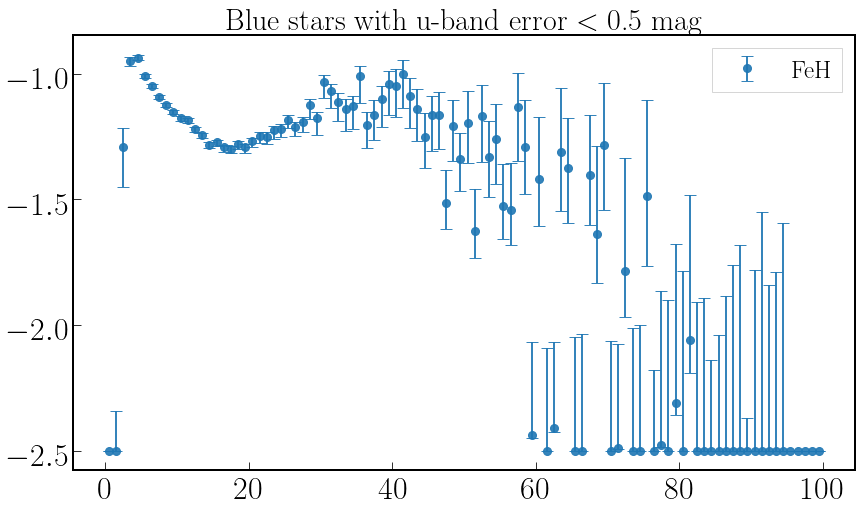

In [41]:
t=mb[(mb.psfmagerr_u<0.5)]#&(mb.FeH!=-2.5)&(mb.FeH!=0.5)]
print(len(t))
D=t.Dkpc
FeH=t.FeH
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D,FeH, 0, 100, 100, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D,FeH, 0, 100, 100, 0)
plt.figure(figsize=(14,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='o' ,capsize=6,markersize=8, alpha=0.9, label='FeH')
#plt.hlines(0,17,24.5,linestyle='dashed')
#plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
plt.title('Blue stars with u-band error $<$ 0.5 mag')
plt.legend()
plt.savefig('../Documents/final/check/FeH10.png')

124214


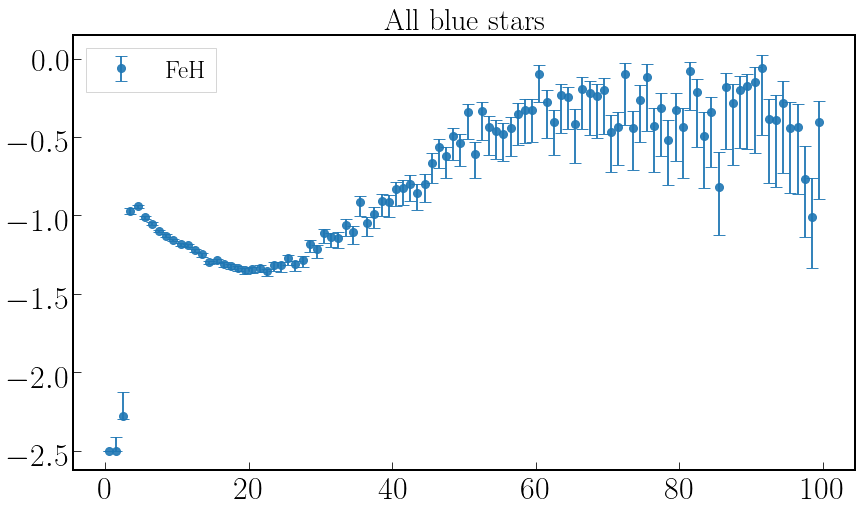

In [37]:
t=mb#[(mb.psfmagerr_u<1)]#&(mb.FeH!=-2.5)&(mb.FeH!=0.5)]
print(len(t))
D=t.Dkpc
FeH=t.FeH
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D,FeH, 0, 100, 100, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D,FeH, 0, 100, 100, 0)
plt.figure(figsize=(14,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='o' ,capsize=6,markersize=8, alpha=0.9, label='FeH')
#plt.hlines(0,17,24.5,linestyle='dashed')
#plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
plt.title('All blue stars')
plt.legend()
plt.savefig('../Documents/final/check/FeH9.png')

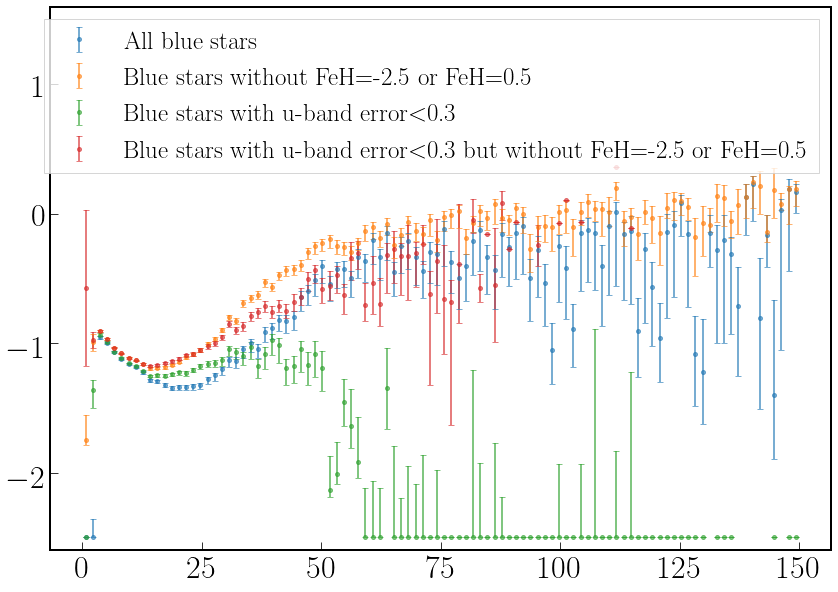

In [46]:
t=[]
t.append(mb)
t.append(mb[(mb.FeH!=-2.5)&(mb.FeH!=0.5)])
t.append(mb[(mb.psfmagerr_u<0.3)])
t.append(mb[(mb.psfmagerr_u<0.3)&(mb.FeH!=-2.5)&(mb.FeH!=0.5)])
c=[]
c.append('All blue stars')
c.append('Blue stars without FeH=-2.5 or FeH=0.5')
c.append('Blue stars with u-band error$<$0.3')
c.append('Blue stars with u-band error$<$0.3 but without FeH=-2.5 or FeH=0.5')
plt.figure(figsize=(14,10))
for i in range(4):
    D=t[i].Dkpc
    FeH=t[i].FeH
    x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D,FeH, 0, 150, 100, 0)
    plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='o' ,capsize=3,markersize=4, alpha=0.6, label=c[i])
plt.ylim(-2.6,1.6)
plt.legend()
plt.savefig('../Documents/final/check/FeH8.png')

In [34]:
t=mb
D=t.Dkpc
FeH=t.D
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D,FeH, 0, 150, 100, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D,FeH, 0, 150, 100, 0)
plt.figure(figsize=(12,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='o' ,capsize=6,markersize=8, alpha=0.9, label='FeH')
#plt.hlines(0,17,24.5,linestyle='dashed')
#plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
#plt.title('Blue stars without FeH=-2.5 or FeH=0.5')
plt.legend()
#plt.savefig('../Documents/final/check/FeH8.png')

AttributeError: 'DataFrame' object has no attribute 'D'

In [55]:
len(mb)

124214

In [268]:

u2=[]
for i in range(len(mb)):
    t=mb.iloc[i]
    mu=2.512**(-t.psfmag_u)
    err=mu*(1-10**(-0.4*t.psfmagerr_u))
    f=np.random.normal(mu,err,1)[0]
    u2.append(-2.5*np.log10(f))
    

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


In [269]:
mb['psfmag_u2']=u2

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [270]:
np.random.seed(999)
u3=[]
for i in range(len(mb)):
    t=mb.iloc[i]
    mu=2.512**(-t.psfmag_u)
    err=mu*(1-10**(-0.4*t.psfmagerr_u))
    f=np.random.normal(mu,err,1)[0]
    u3.append(-2.5*np.log10(f))
    

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


In [271]:
mb['psfmag_u3']=u3

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
mb=mb[pd.notna(mb.psfmag_u3)]
mb=mb[pd.notna(mb.psfmag_u2)]

In [17]:
gi=mb.g_psfflux_mag-mb.i_psfflux_mag
mb['FeH2']=getPhotomMetallicityBond2010(mb.psfmag_u2-mb.g_psfflux_mag,mb.g_psfflux_mag-mb.r_psfflux_mag)
mb['FeH3']=getPhotomMetallicityBond2010(mb.psfmag_u3-mb.g_psfflux_mag,mb.g_psfflux_mag-mb.r_psfflux_mag)
mb['Dkpc2']=getMainSequenceDistanceKpc(gi,mb.FeH2,mb.r_psfflux_mag)
mb['Dkpc3']=getMainSequenceDistanceKpc(gi,mb.FeH3,mb.r_psfflux_mag)


NameError: name 'getPhotomMetallicityBond2010' is not defined

In [280]:
mbb=mb[(mb.FeH!=-2.5)&(mb.FeH!=0.5)&(mb.FeH2!=0.5)&(mb.FeH3!=0.5)&(mb.FeH2!=-2.5)&(mb.FeH3!=-2.5)]

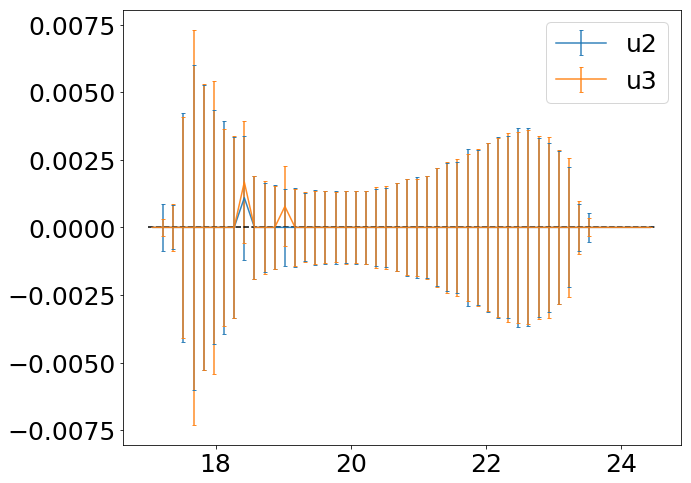

In [289]:
t=mb
imag=t.i_psfflux_mag
D=t.Dkpc
Du2=t.Dkpc2
Du3=t.Dkpc3
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(imag,(Du2-D)/D, 17, 24.5, 50, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(imag,(Du3-D)/D, 17, 24.5, 50, 0)
plt.figure(figsize=(10,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'u2')
plt.errorbar(x2Bin, m2edianBin, s2igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'u3')
plt.hlines(0,17,24.5,linestyle='dashed')
#plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
#plt.title('Blue stars without FeH=-2.5 or FeH=0.5')
plt.legend()
plt.savefig('../Documents/final/check/FeH6.png')

In [281]:
len(mbb)

81654

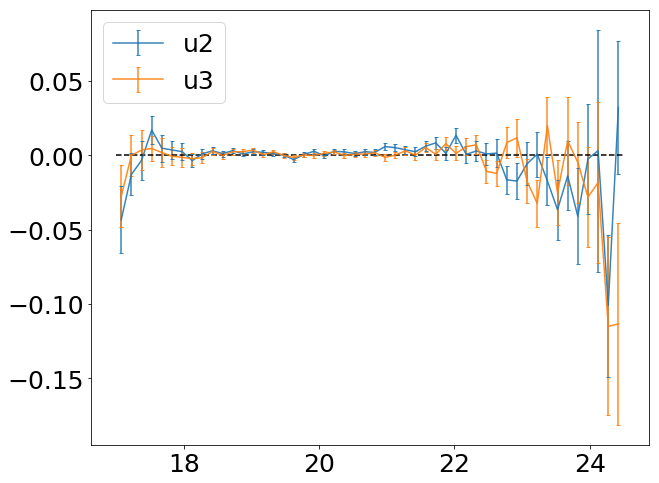

In [288]:
t=mbb
imag=t.i_psfflux_mag
D=t.Dkpc
Du2=t.Dkpc2
Du3=t.Dkpc3
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(imag,(Du2-D)/D, 17, 24.5, 50, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(imag,(Du3-D)/D, 17, 24.5, 50, 0)
plt.figure(figsize=(10,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'u2')
plt.errorbar(x2Bin, m2edianBin, s2igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'u3')
plt.hlines(0,17,24.5,linestyle='dashed')
#plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
#plt.title('Blue stars without FeH=-2.5 or FeH=0.5')
plt.legend()
plt.savefig('../Documents/final/check/FeH7.png')

In [300]:
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = -1+0*np.linspace(0, 1, Nbin) 
#    sigGbin2 = -1+0*np.linspace(0, 1, Nbin) #for measurement error
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux1 = y[(x>xEdge[i])&(x<=xEdge[i+1])]
#        yErr = ye[(x>xEdge[i])&(x<=xEdge[i+1])]
        yAux = yAux1[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping
#        yErr = yErr[(yAux1<np.percentile(yAux1,99.85))&(yAux1>np.percentile(yAux1,0.15))]#3sigma clipping

        if (yAux.size > 0):
            nPts[i] = yAux.size
            print(np.median(yAux),np.mean(yAux),np.std(yAux))
            medianBin[i] = np.median(yAux) #mean
            # robust estimate of standard deviation: 0.741*(q75-q25)
            sigmaG = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,25))
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[i] = np.sqrt(np.pi/2)*sigmaG/np.sqrt(nPts[i])
#            sigGbin2[i] = np.median(yErr)/np.sqrt(nPts[i]) #measurement error 
        else:
            nPts[i] = 0 
            medianBin[i] = 0 
            sigGbin[i] = 0 
            sigGbin2[i] = 0 
            # nPts[i], medianBin[i], sigGBin[i] = 0 
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin#, sigGbin2




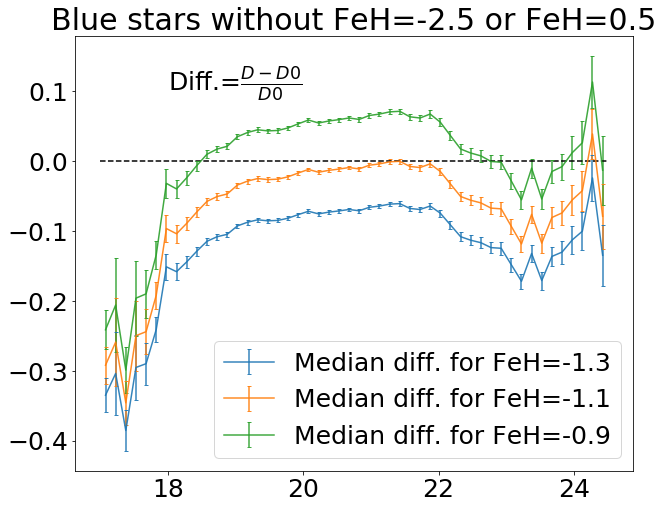

In [210]:
diff1=[]
diff2=[]
diff3=[]
t=mbb
imag=t.i_psfflux_mag
D=t.Dkpc
D1=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-1.3,t.r_psfflux_mag)
D2=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-1.1,t.r_psfflux_mag)
D3=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-0.9,t.r_psfflux_mag)
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(imag,(D1-D)/D, 17, 24.5, 50, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(imag,(D2-D)/D, 17, 24.5, 50, 0)
x3Bin, n3Pts, m3edianBin, s3igGbin = fitMedians(imag,(D3-D)/D, 17, 24.5, 50, 0)
plt.figure(figsize=(10,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-1.3')
plt.errorbar(x2Bin, m2edianBin, s2igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-1.1')
plt.errorbar(x3Bin, m3edianBin, s3igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-0.9')
plt.hlines(0,17,24.5,linestyle='dashed')
plt.text(18,0.1,r'Diff.=$\frac{D-D0}{D0}$')
plt.title('Blue stars without FeH=-2.5 or FeH=0.5')
plt.legend()
plt.savefig('../Documents/final/check/FeH5.png')

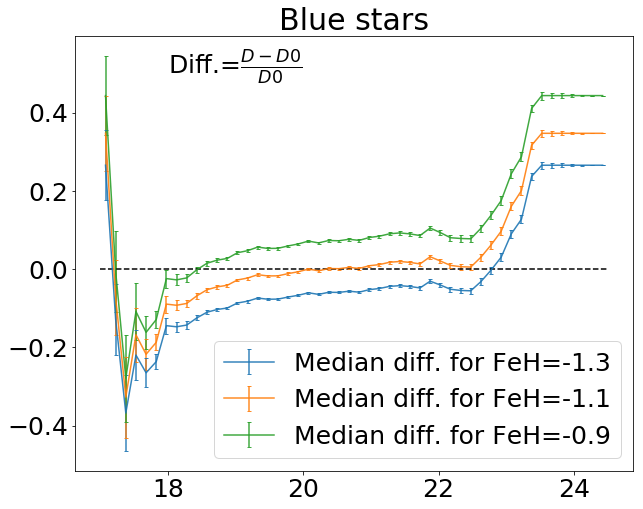

In [209]:
diff1=[]
diff2=[]
diff3=[]
t=mb
imag=t.i_psfflux_mag
D=t.Dkpc
D1=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-1.3,t.r_psfflux_mag)
D2=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-1.1,t.r_psfflux_mag)
D3=getMainSequenceDistanceKpc(t.g_psfflux_mag-t.i_psfflux_mag,-0.9,t.r_psfflux_mag)
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(imag,(D1-D)/D, 17, 24.5, 50, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(imag,(D2-D)/D, 17, 24.5, 50, 0)
x3Bin, n3Pts, m3edianBin, s3igGbin = fitMedians(imag,(D3-D)/D, 17, 24.5, 50, 0)
plt.figure(figsize=(10,8))
plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-1.3')
plt.errorbar(x2Bin, m2edianBin, s2igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-1.1')
plt.errorbar(x3Bin, m3edianBin, s3igGbin, fmt='-' ,capsize=2, alpha=0.9, label=r'Median diff. for FeH=-0.9')
plt.hlines(0,17,24.5,linestyle='dashed')
plt.text(18,0.5,r'Diff.=$\frac{D-D0}{D0}$')
plt.title('Blue stars')
plt.legend()
plt.savefig('../Documents/final/check/FeH4.png')

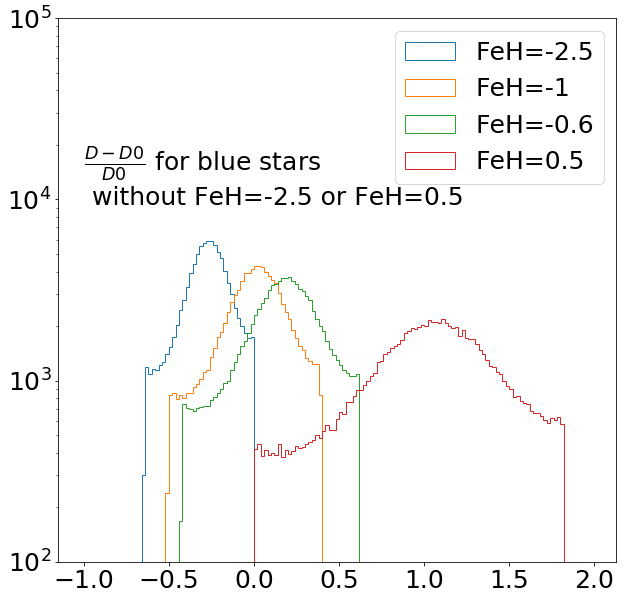

In [208]:
D=mbb.Dkpc
gi=mbb.g_psfflux_mag-mbb.i_psfflux_mag
plt.figure(figsize=(10,10))
for i in [-2.5,-1,-0.6,0.5]:
    t=getMainSequenceDistanceKpc(gi,i,mbb.r_psfflux_mag)
    bins=np.arange(-1,2,0.02)
    plt.hist((t-D)/D,bins=bins,histtype='step',label='FeH='+str(i))
    plt.yscale('log')
    plt.legend()
plt.text(-1,1e4,r'$\frac{D-D0}{D0}$ for blue stars'+' \n without FeH=-2.5 or FeH=0.5')
plt.ylim(100,100000)
plt.savefig('../Documents/final/check/FeH3.png')

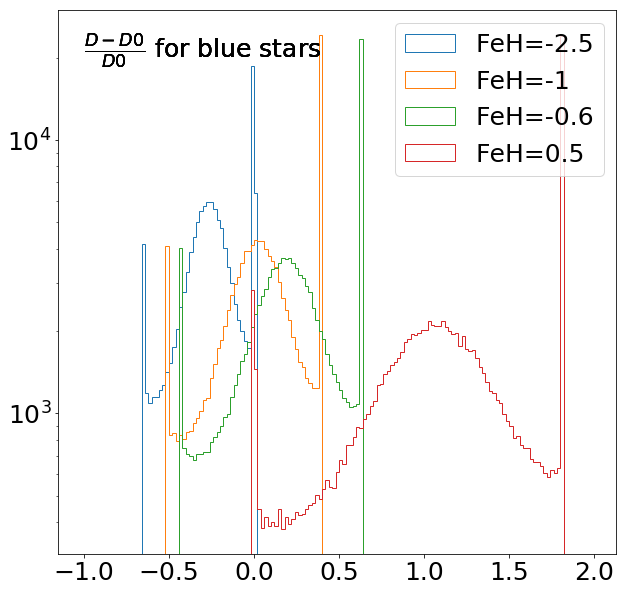

In [130]:
D=mb.Dkpc
gi=mb.g_psfflux_mag-mb.i_psfflux_mag
plt.figure(figsize=(10,10))
for i in [-2.5,-1,-0.6,0.5]:
    t=getMainSequenceDistanceKpc(gi,i,mb.r_psfflux_mag)
    bins=np.arange(-1,2,0.02)
    plt.hist((t-D)/D,bins=bins,histtype='step',label='FeH='+str(i))
    plt.yscale('log')
    plt.legend()
    plt.text(-1,2e4,r'$\frac{D-D0}{D0}$ for blue stars')
plt.savefig('../Documents/final/check/FeH2.png')

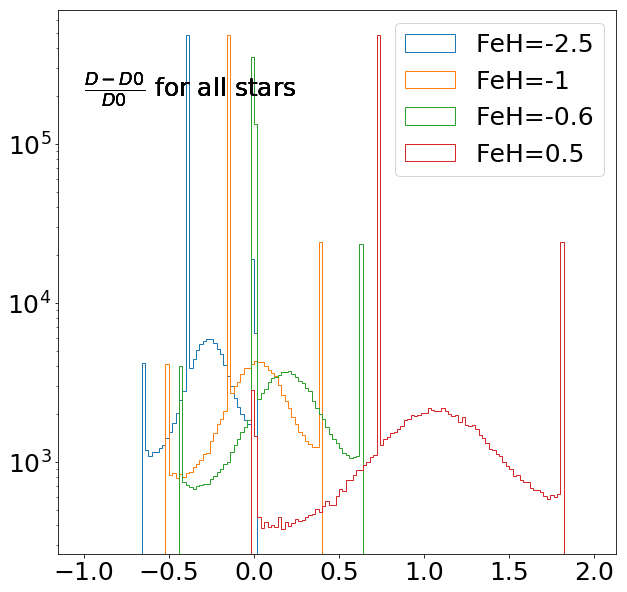

In [133]:
D=ms.Dkpc
gi=ms.g_psfflux_mag-ms.i_psfflux_mag
plt.figure(figsize=(10,10))
for i in [-2.5,-1,-0.6,0.5]:
    t=getMainSequenceDistanceKpc(gi,i,ms.r_psfflux_mag)
    bins=np.arange(-1,2,0.02)
    plt.hist((t-D)/D,bins=bins,histtype='step',label='FeH='+str(i))
    plt.yscale('log')
    plt.legend()
    plt.text(-1,2e5,r'$\frac{D-D0}{D0}$ for all stars')
plt.savefig('../Documents/final/check/FeH1.png')

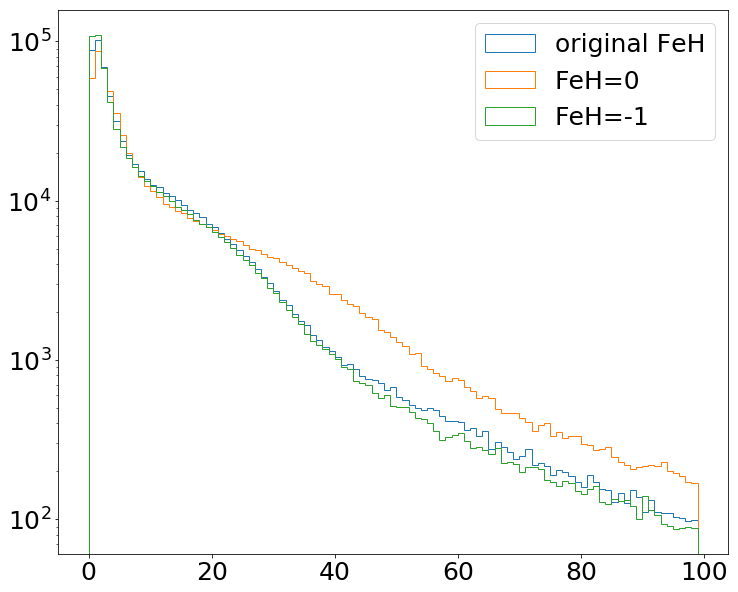

In [20]:
plt.figure(figsize=(12,10))
bins=np.arange(0,100,1)
plt.hist(D,bins=bins,histtype='step',label='original FeH')
plt.hist(D0,bins=bins,histtype='step',label='FeH=0')
plt.hist(D1,bins=bins,histtype='step',label='FeH=-1')
plt.yscale('log')
plt.legend()

In [387]:
D0=getMainSequenceDistanceKpc(mb.gi,mb.FeH,mb.r_psfflux_mag)

In [403]:
D=getMainSequenceDistanceKpc(mb.gi,0,mb.r_psfflux_mag)

In [404]:
D2=getMainSequenceDistanceKpc(mb.gi,-1,mb.r_psfflux_mag)

In [376]:
FeH3=getPhotomMetallicityBond2010(mb.gz,mb.gr)
D3=getMainSequenceDistanceKpc(mb.gi,FeH3,mb.r_psfflux_mag)

In [410]:
DDD=pd.DataFrame({'D0':D0,'D_FeH0':D,'r1':(D-D0)/D0,'D_FeH-1':D2,'r2':(D2-D0)/D0,'D_FeHgz':D3,'r3':(D3-D0)/D0})

Text(0.5, 1.0, 'Histogram of Relative diff. for Distance from different FeH model')

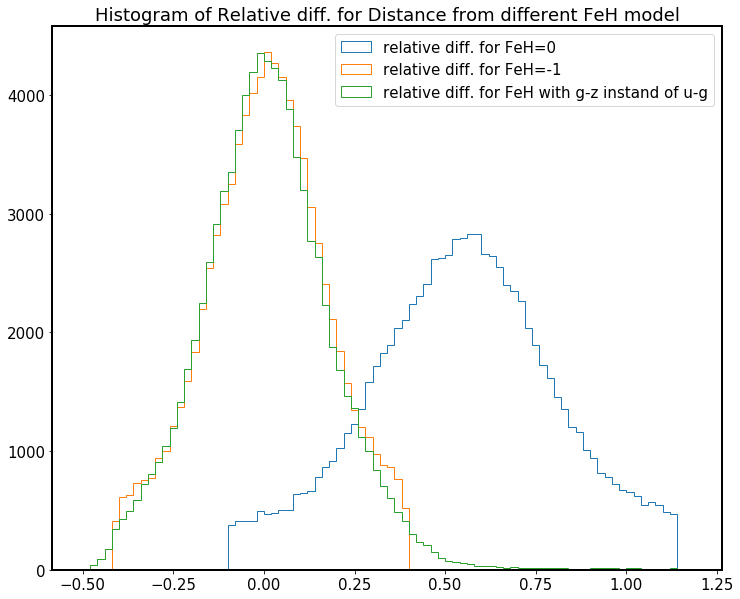

In [433]:
plt.figure(figsize=(12,10))
bins=np.arange(-0.5,1.2,0.02)
plt.hist(DDD.r1,bins=bins,histtype='step',label='relative diff. for FeH=0')
plt.hist(DDD.r2,bins=bins,histtype='step',label='relative diff. for FeH=-1')
plt.hist(DDD.r3,bins=bins,histtype='step',label='relative diff. for FeH with g-z instand of u-g')
plt.legend()
plt.title('Histogram of Relative diff. for Distance from different FeH model')
plt.savefig('hist_diff_Dist_FeH.png')

Text(0, 0.5, 'u-g')

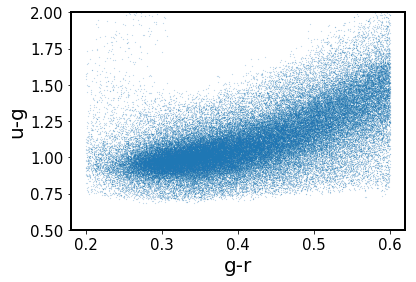

In [375]:
plt.scatter(mb.gr,mb.ug,s=0.01)
plt.ylim(0.5,2)
plt.xlabel('g-r')
plt.ylabel('u-g')

Text(0, 0.5, 'g-z')

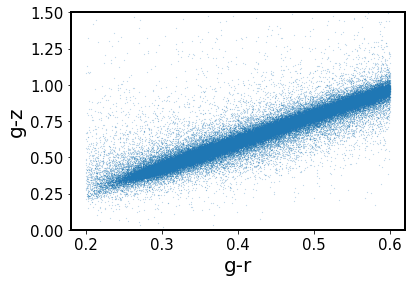

In [374]:
plt.scatter(mb.gr,mb.gz,s=0.01)
plt.ylim(0,1.5)
plt.xlabel('g-r')
plt.ylabel('g-z')

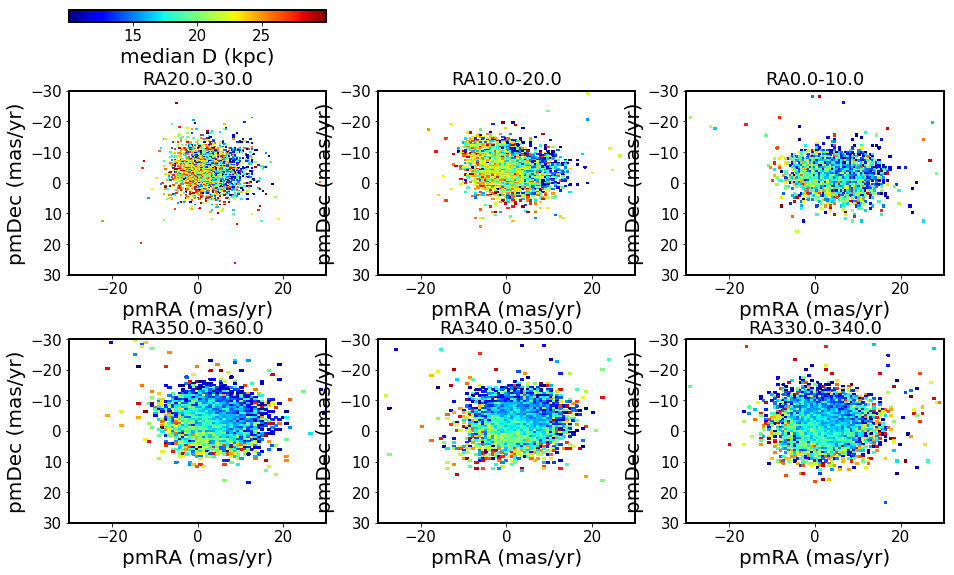

In [20]:
## The pmdec vs. pmra distribution for 10-30kpc blue stars
cond = (mb.D2>10)&(mb.D2<30)
raB = mb[cond].i_sdsscentroid_ra
DappB = mb[cond].D2
pmRAB = mb[cond].pmra
pmDecB = mb[cond].pmdec
plotCoded2DmapRAbins(pmRAB, pmDecB, DappB, raB, -30, 30, -30, 30, 200, 'pmRA (mas/yr)', 'pmDec (mas/yr)', 'D (kpc)')
#plt.savefig('../distance/pmDec_vs_pmRA_.png')

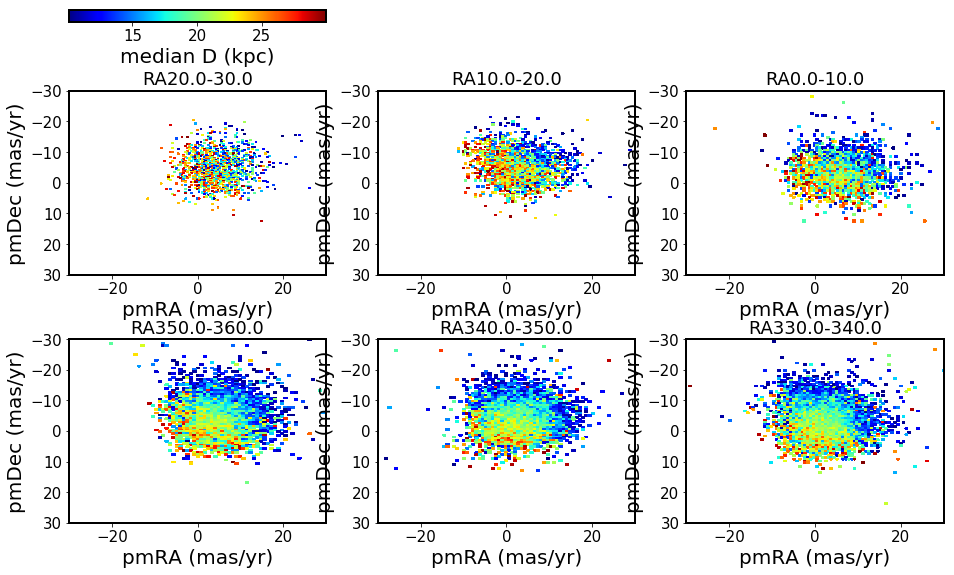

In [115]:
## The pmdec vs. pmra distribution for 10-30kpc blue stars
cond = (mb.D>10)&(mb.D<30)
raB = mb[cond].i_sdsscentroid_ra
DappB = mb[cond].D
pmRAB = mb[cond].pmra
pmDecB = mb[cond].pmdec
plotCoded2DmapRAbins(pmRAB, pmDecB, DappB, raB, -30, 30, -30, 30, 200, 'pmRA (mas/yr)', 'pmDec (mas/yr)', 'D (kpc)')
#plt.savefig('../distance/pmDec_vs_pmRA_.png')

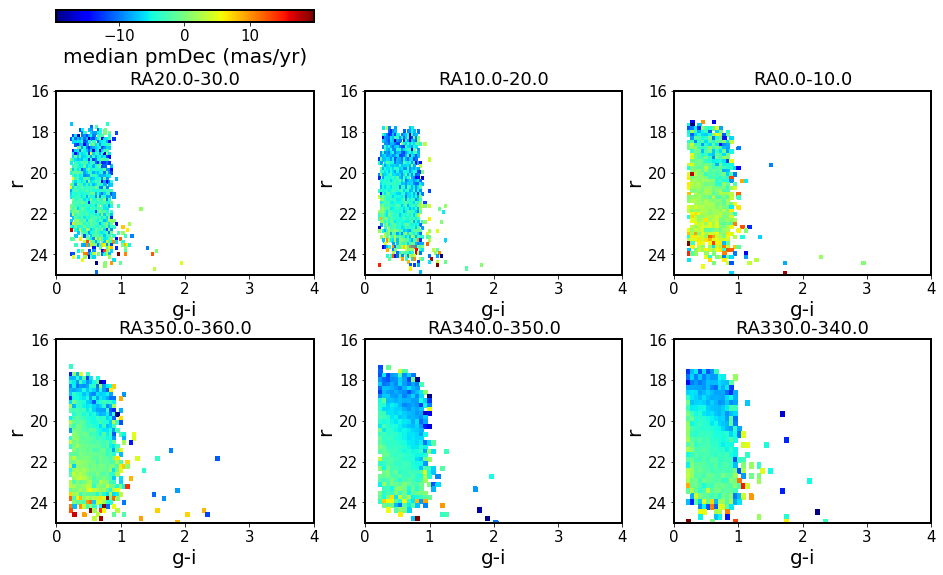

In [116]:

pmRA = mb.pmra
pmDec = mb.pmdec

pmRAOK = pmRA[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)]
pmDecOK = pmDec[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)]
giOK = mb.gi[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)]
rOK = mb.r[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)] 
RAOK = mb.ra_2[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)] 
FeHOK = mb.FeH[(np.abs(pmRA)<20)&(np.abs(pmDec)<20)] 
plotCoded2DmapRAbins(giOK, rOK, pmDecOK, RAOK, 0.0, 4.0, 16, 25, 50, 'g-i', 'r', 'pmDec (mas/yr)')
#plt.savefig('distance/pmDec_r_vs_g-i.png')

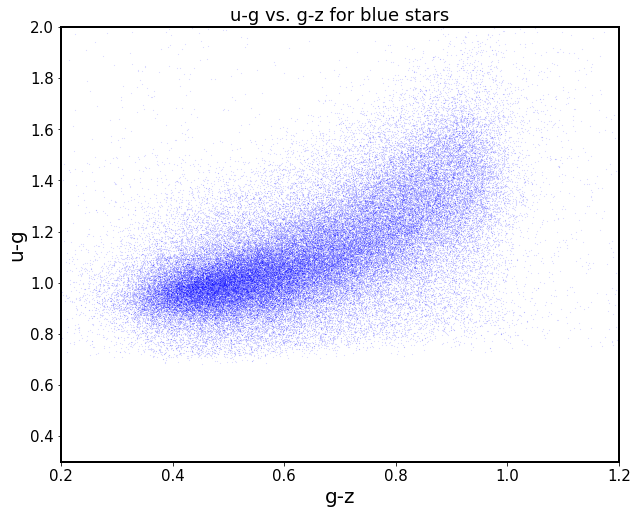

In [296]:

# plot
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(mb.gz, mb.ug, s=0.01, c='blue',alpha=0.5)
ax.set_xlim(0.2,1.2)
ax.set_ylim(0.3,2)
ax.set_xlabel('g-z')
ax.set_ylabel('u-g')
plt.title('u-g vs. g-z for blue stars')
plt.savefig('../FeHfit/ug_vs_gz_blue.png')



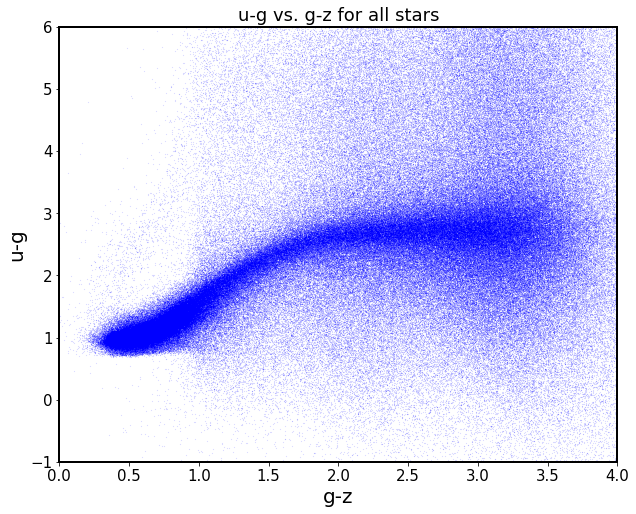

In [297]:

# plot
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(m.gz, m.ug, s=0.01, c='blue',alpha=0.5)
ax.set_xlim(0,4)
ax.set_ylim(-1,6)
ax.set_xlabel('g-z')
ax.set_ylabel('u-g')
plt.title('u-g vs. g-z for all stars')
plt.savefig('../FeHfit/ug_vs_gz_all.png')


In [257]:
def fit(x,y,xmin,xmax,Nbin):
    xEdge = np.linspace(xmin, xmax, (Nbin+1)) 
    mean = 0*np.linspace(0, 1, Nbin)
    median = 0*np.linspace(0, 1, Nbin)
    y16 = 0*np.linspace(0, 1, Nbin)
    y84 = 0*np.linspace(0, 1, Nbin)
    xBin = np.linspace(0, 1, Nbin)
    for i in range(Nbin):
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux = y[(x>xEdge[i])&(x<=xEdge[i+1])]
        y84[i] = np.percentile(yAux,84)
        y16[i] = np.percentile(yAux,16)
        yAux = yAux[(yAux<y84[i])&(yAux>y16[i])]
        mean[i]=np.mean(yAux)
        median[i]=np.median(yAux)
    return xBin,mean,median,y16,y84

In [ ]:
#for blue stars 

In [347]:
x,ymean,ymedian,y16,y84=fit(mb.gz,mb.ug,0.3,1,100)
z1=np.polyfit(x,ymedian,2)
z1

array([ 0.95867366, -0.49863879,  1.01043937])

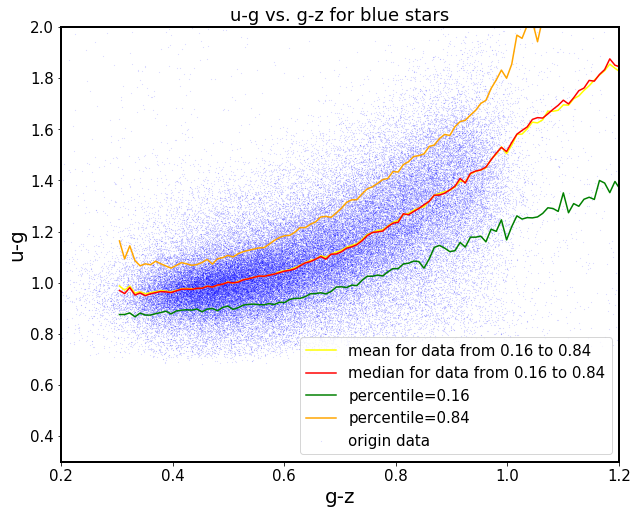

In [344]:
plt.figure(figsize=(10,8))
plt.plot(x,ymean,c='yellow',label='mean for data from 0.16 to 0.84')
plt.plot(x,ymedian,c='red',label='median for data from 0.16 to 0.84')
plt.plot(x,y16,c='green',label='percentile=0.16')
plt.plot(x,y84,c='orange',label='percentile=0.84')
plt.scatter(mb.gz, mb.ug, s=0.01, c='blue',alpha=0.5,label='origin data')
plt.legend()
plt.title('u-g vs. g-z for blue stars')
plt.xlabel('g-z')
plt.ylabel('u-g')
plt.xlim(0.2,1.2)
plt.ylim(0.3,2)
plt.savefig('../FeHfit/ug_vs_gz_blue.png')

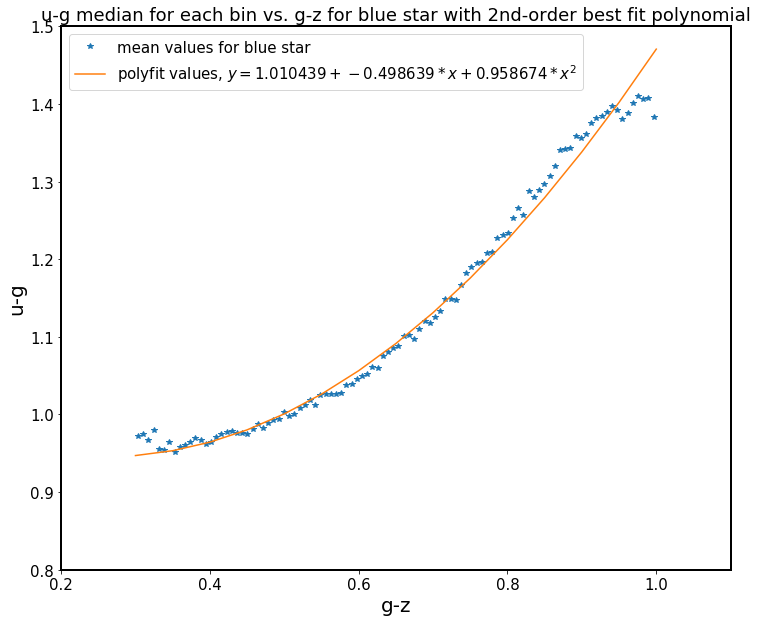

In [340]:
plt.figure(figsize=(12,10))
p1 = np.poly1d(z1)
xx=np.arange(0.3,1.05,0.05)
yvals=p1(xx)#也可以使用yvals=np.polyval(z1,x)
plot1=plt.plot(x, ymean, '*',label='mean values for blue star')
plot2=plt.plot(xx, yvals,label='polyfit values, $y=%f+%f*x+%f*x^2$'%(z1[2],z1[1],z1[0]))
plt.xlabel('g-z')
plt.ylabel('u-g')
plt.xlim(0.2,1.1)
plt.ylim(0.8,1.5)
plt.legend()
plt.title('u-g median for each bin vs. g-z for blue star with 2nd-order best fit polynomial')
plt.savefig('../FeHfit/ug_vs_gz_fit_blue.png')

In [342]:
x,ymean,ymedian,y16,y84=fit(m.gz,m.ug,0.3,4,400)
z2=np.polyfit(x,ymedian,4)
z2

array([ 0.07224754, -0.58384286,  1.28438086,  0.16900579,  0.65246495])

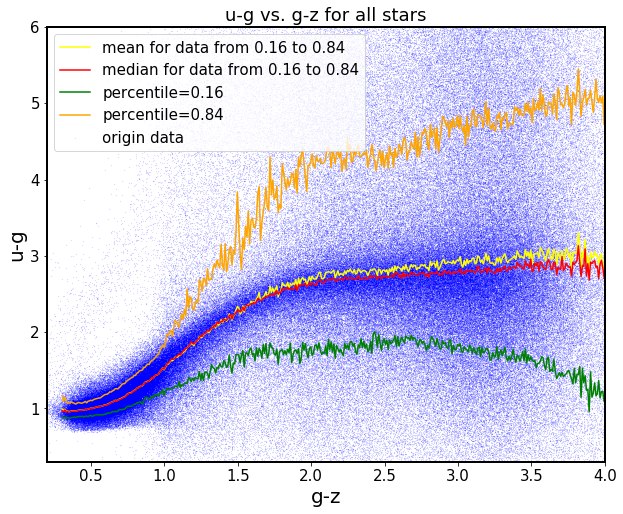

In [345]:
plt.figure(figsize=(10,8))
plt.plot(x,ymean,c='yellow',label='mean for data from 0.16 to 0.84')
plt.plot(x,ymedian,c='red',label='median for data from 0.16 to 0.84')
plt.plot(x,y16,c='green',label='percentile=0.16')
plt.plot(x,y84,c='orange',label='percentile=0.84')
plt.scatter(m.gz, m.ug, s=0.01, c='blue',alpha=0.5,label='origin data')
plt.legend()
plt.title('u-g vs. g-z for all stars')
plt.xlabel('g-z')
plt.ylabel('u-g')
plt.xlim(0.2,4)
plt.ylim(0.3,6)
plt.savefig('../FeHfit/ug_vs_gz_all.png')

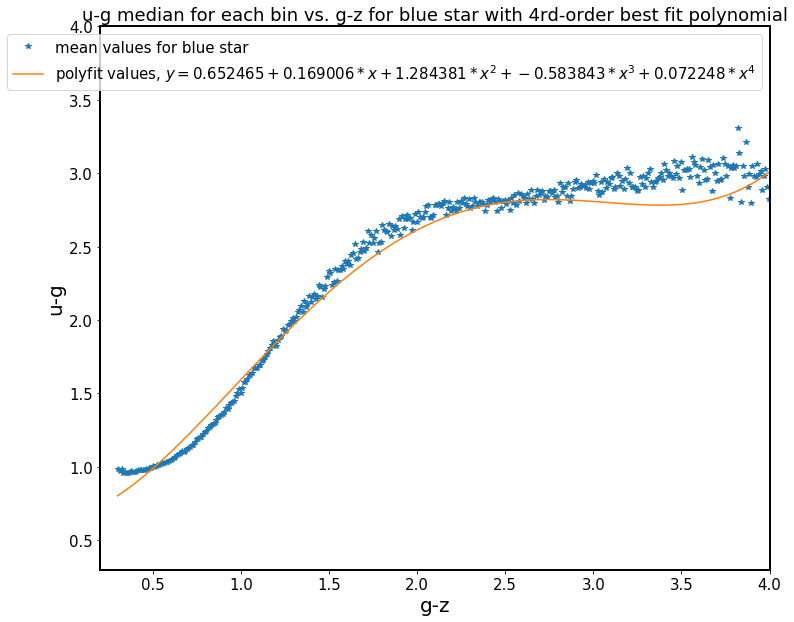

In [346]:
plt.figure(figsize=(12,10))
p2 = np.poly1d(z2)
xx=np.arange(0.3,4.05,0.05)
yvals=p1(xx)#也可以使用yvals=np.polyval(z1,x)
plot1=plt.plot(x, ymean, '*',label='mean values for blue star')
plot2=plt.plot(xx, yvals,label='polyfit values, $y=%f+%f*x+%f*x^2+%f*x^3+%f*x^4$'%(z1[4],z1[3],z1[2],z1[1],z1[0]))
plt.xlabel('g-z')
plt.ylabel('u-g')
plt.xlim(0.2,4)
plt.ylim(0.3,4)
plt.legend()
plt.title('u-g median for each bin vs. g-z for blue star with 4rd-order best fit polynomial')
plt.savefig('../FeHfit/ug_vs_gz_fit_all.png')

In [426]:
mb['D3']=D3

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


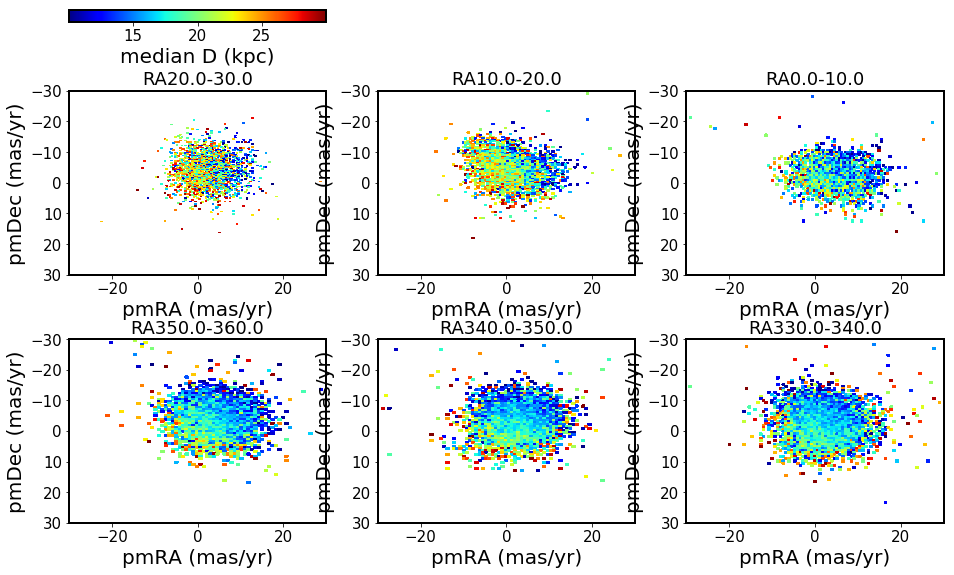

In [351]:
FeH2=getPhotomMetallicityBond2010(mb.gz,mb.gr)

In [361]:
D3=getMainSequenceDistanceKpc(mb.gi,FeH2,mb.r_psfflux_mag)

In [364]:
mb.D2

5          5.353930
9         13.178645
11        29.148320
25         7.143065
27        20.680953
40        31.688925
43         3.303093
47         8.956627
50        11.302927
51        13.946523
52        18.795559
53         3.370140
60        10.980729
70         7.022782
71        36.299493
72         9.496590
83        26.437489
85        26.723206
86        21.869073
88        13.712559
93        19.271036
96         3.107645
101        6.819349
111       35.442741
113       17.712103
116        8.159354
122       12.754000
127       21.933447
136       36.421732
145        6.645544
            ...    
459080    15.237201
459081    14.268738
459084    29.911047
459089     9.393365
459092    15.067545
459095    16.993445
459098    21.073222
459115    73.569878
459117    20.002626
459125     4.674744
459128    19.043076
459130    21.578014
459133    16.699493
459134     6.258954
459142    14.402455
459172    28.247900
459180     7.475246
459184     9.017524
459191     7.788208


In [6]:
def getMainSequenceAbsMag(gi,FeH): 
    """Get absolute magnitude for main sequence stars using eqs. 2, 5, and 7 from
       Ivezic et al. 2008 (ApJ, 684, 287)"""

    # valid for 0.2 < g-i < 4.0 
    Mr0 = -5.06 + 14.32*gi - 12.97*gi**2 + 6.127*gi**3 - 1.267*gi**4 + 0.0967*gi**5
    # offset for metallicity, valid for -2.5 < FeH < 0.2
    Mr = Mr0 + 4.50 - 1.11*FeH - 0.18*FeH**2
    return Mr

def getMainSequenceDistanceKpc(gi,FeH,r): 
    """Get stellar distance in kpc"""
    
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    # distance in kpc
    Dkpc = 0.01 * 10**(0.2*(r-Mr))
    return Dkpc

def getMainSequenceAppMagforDistanceKpc(gi,FeH,Dkpc): 
    """Get apparent mag array for g-i array, given FeH and Dkpc"""
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    return Mr + 5*np.log10(100*Dkpc)  

def getPhotomMetallicityBond2010(gz,gr):
    """Get stellar photometric metallicity from the SDSS u, g and r magnitudes
       using eq.A1 from Bond et al. 2010 (ApJ, 716, 1):
       [Fe/H]=A+Bx+Cy+Dxy+Ex2+Fy2+Gx2y+Hxy2+Ix3+Jy3
       with x = (u-g) and y = (g-r), and the best-fit coefficients 
       (A-J) = (-13.13, 14.09, 28.04, -5.51, -5.90, -58.68, 9.14, -20.61, 0.0, 58.20).
       This expression if valid only for g-r<0.6; for redder stars uses [Fe/H] = -0.6.
       Beyond the limits -2.5 and 0.5, use the limits. Add Gaussian noise with rms=0.1"""

    # aux variables
    #modified
    p1 = np.poly1d(z1)
    ug = p1(gz)
    #modified
    x = ug
    y = gr
    xy = x*y
    x2 = x*x
    y2 = y*y
    x2y = x*x*y
    xy2 = x*y*y
    y3 = y*y*y

    A = -13.13  
    B =  14.09
    C =  28.04
    D =  -5.51
    E =  -5.90
    F = -58.68
    G =   9.14
    H = -20.61
    I =  58.20
    FeH = A + B*x + C*y + D*xy + E*x2 + F*y2 + G*x2y + H*xy2 + I*y3 
    # add Gaussian noise (rms=0.1 dex) 
    np.random.seed(666) 
    b = np.random.randn(FeH.shape[0])  # Gaussian
    FeH = FeH + 0.1*b
    FeH[gr>0.6] = -0.6
    FeH[FeH < -2.5] = -2.5
    FeH[FeH > 0.5] = 0.5
    return FeH    

In [72]:
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = -1+0*np.linspace(0, 1, Nbin) 
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux = y[(x>xEdge[i])&(x<=xEdge[i+1])]
        if (yAux.size > 0):
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux)
            # robust estimate of standard deviation: 0.741*(q75-q25)
            sigmaG = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,25))
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[i] = np.sqrt(np.pi/2)*sigmaG/np.sqrt(nPts[i])
        else:
            nPts[i] = 0 
            medianBin[i] = 0 
            sigGbin[i] = 0 
            # nPts[i], medianBin[i], sigGBin[i] = 0 
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin


def plotCoded2DmapRAbins(x, y, z, RA, xMin, xMax, yMin, yMax, nBin, xLabel, yLabel, cLabel, median=True):

    rcParams['ytick.labelsize'] = 15
    rcParams['xtick.labelsize'] = 15
    rcParams['axes.labelsize'] = 20
    rcParams['axes.linewidth'] = 2
    rcParams['font.size'] = 15
    rcParams['axes.titlesize'] = 18

    def selectRAbin(x, y, z, RA, RAmin, RAmax): 
        xB = x[(RA>RAmin)&(RA<RAmax)]
        yB = y[(RA>RAmin)&(RA<RAmax)]
        zB = z[(RA>RAmin)&(RA<RAmax)]
        return xB, yB, zB 

    # define plotting space 
    fig = plt.figure(figsize=(15,8)) 
    fig.subplots_adjust(hspace=0.35, top=0.85, bottom=0.1, left=0.12, right=0.93)
    # location of the colorbar in Figure units 
    bottom, height =  0.97, 0.02 
            
    # calculate the 2D statistics 
    if (median):
        statsName = 'median'   
        cLlabel = 'median ' + cLabel
    else:
        statsName = 'rms' 
        cLlabel = 'rms for ' + cLabel
         
    RAmin = np.zeros(6) 
    RAmin[0] = 20
    RAmin[1] = 10
    RAmin[2] = 0
    RAmin[3] = 350
    RAmin[4] = 340
    RAmin[5] = 330


    for i in range(0,6):
        ax = plt.subplot(2,3,i+1) 
        ax.set_xlabel(xLabel)
        ax.set_ylabel(yLabel)
        title = 'RA'+str(RAmin[i])+'-'+str(RAmin[i]+10)
        ax.set_title(title)
        plt.xlim([xMin,xMax])
        plt.ylim([yMax,yMin])
        ax.plot([xMin, xMax], [0, 0], lw=1, c='black')
        ax.plot([0, 0], [yMin, yMax], lw=1, c='black')

        # extract the 2D statistic,  and location of bin edges 
        xB, yB, zB = selectRAbin(x, y, z, RA, RAmin[i], RAmin[i]+10.0)
        # print('i:', i, np.size(xB), np.size(yB), np.size(zB))
        stats =  binned_statistic_2d(xB, yB, zB, statistic=statsName, bins=nBin)
        H, xedges, yedges= stats[0].T , stats[1], stats[2]

        # span the grid from bin edges 
        X_, Y_ = np.meshgrid(xedges, yedges)
        cmap = 'viridis'
        cmap = 'jet'


        # plot the image 
        image = ax.pcolormesh(X_, Y_, H, cmap=cmap)

        if (i==0): 
            # extract the left corner and width of colorbar from axis - 
            # works well for multiple axes since location of 
            # new axis must be in figure units 
            l,b,w,h = ax.get_position().bounds
            cax = fig.add_axes([l,bottom,w,height])
            # plot the colorbar 
            plt.colorbar(mappable = image, cax = cax, orientation='horizontal', label=cLlabel)
'''         
        if (1):
            giGrid = np.linspace(0.0,4.5,100)
            FeH = -1.5
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,0.3)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,1.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,3.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,10.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,30.0)
            ax.plot(giGrid, rD)

'''
 #   plt.savefig('Fig_Coded2DmapRAbins.png', bbox_inches='tight', dpi=100)

'         \n        if (1):\n            giGrid = np.linspace(0.0,4.5,100)\n            FeH = -1.5\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,0.3)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,1.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,3.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,10.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,30.0)\n            ax.plot(giGrid, rD)\n\n'

In [ ]:
#made after Oct.15 with new catalog from Zeljko

In [6]:
z=pd.read_csv('/Users/tianqiu/Downloads/catalog/Zeljko_DR7.csv')

In [10]:
m=pd.read_csv('/Users/tianqiu/Downloads/catalog/m_both_stars_i<24.2_ira_c_dist_sm.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
z.columns

Index(['X', 'Y', 'Z', 'vX', 'vY', 'vZ', 'Zph', 'Mr', 'D', 'fDerr', 'ra', 'dec',
       'run', 'Ar', 'u', 'g', 'r', 'i', 'z', 'uErr', 'gErr', 'rErr', 'iErr',
       'zErr', 'errX', 'errY', 'errZ', 'ZphErr', 'fDerr2', 'pmL', 'pmB'],
      dtype='object')

In [11]:
m.columns

Index(['Unnamed: 0', '# object_id', 'ra_1', 'dec_1', 'r_extendedness_value',
       'i_sdsscentroid_ra', 'i_sdsscentroid_dec', 'i_sdsscentroid_rasigma',
       'i_sdsscentroid_decsigma', 'g_cmodel_mag', 'r_cmodel_mag',
       'i_cmodel_mag', 'z_cmodel_mag', 'g_cmodel_magsigma',
       'r_cmodel_magsigma', 'i_cmodel_magsigma', 'z_cmodel_magsigma',
       'g_psfflux_mag', 'r_psfflux_mag', 'i_psfflux_mag', 'z_psfflux_mag',
       'g_psfflux_magsigma', 'r_psfflux_magsigma', 'i_psfflux_magsigma',
       'z_psfflux_magsigma', 'a_g', 'a_r', 'a_i', 'a_z', 'col1', 'ra_2',
       'dec_2', 'flags', 'type', 'rowc_r', 'colc_r', 'rowcErr_r', 'colcErr_r',
       'u', 'g', 'r', 'i', 'z', 'err_u', 'err_g', 'err_r', 'err_i', 'err_z',
       'psfmag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'psfmagerr_u', 'psfmagerr_g', 'psfmagerr_r', 'psfmagerr_i',
       'psfmagerr_z', 'extinction_u', 'extinction_g', 'extinction_r',
       'extinction_i', 'extinction_z', 'Separation', 'ug', 'gr', 'gi',

In [54]:
#mb for blue star 0.2<gr<0.6
mb=m[(m.gr<0.6)&(m.gr>0.2)]
#mr for red star 1.2<gr<1.6
mr=m[(m.gr>1.2)&(m.gr<1.6)]

In [183]:
mb=mb[mb.i_psfflux_mag>18]

In [184]:
m1=mb[(mb.Dkpc>1)&(mb.Dkpc<5)]
m2=mb[(mb.Dkpc>5)&(mb.Dkpc<10)]
m3=mb[(mb.Dkpc>10)&(mb.Dkpc<15)]

In [76]:
z['D']=z.D/1000

In [166]:
z=z[(z.dec<1.26)&(z.dec>-1.26)&(z.i>18)]

In [167]:
z1=z[(z.D>1)&(z.D<5)]
z2=z[(z.D>5)&(z.D<10)]
z3=z[(z.D>10)&(z.D<15)]

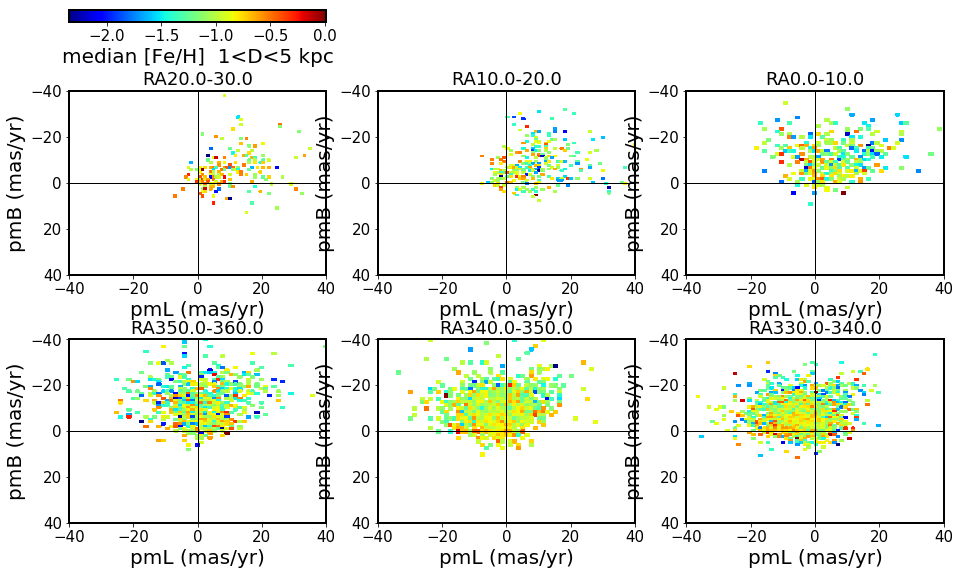

In [188]:
plotCoded2DmapRAbins(m1.pm_lcosb, m1.pm_b, m1.FeH, m1.i_sdsscentroid_ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  1<D<5 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/1<D<5_HSC_S82.png')

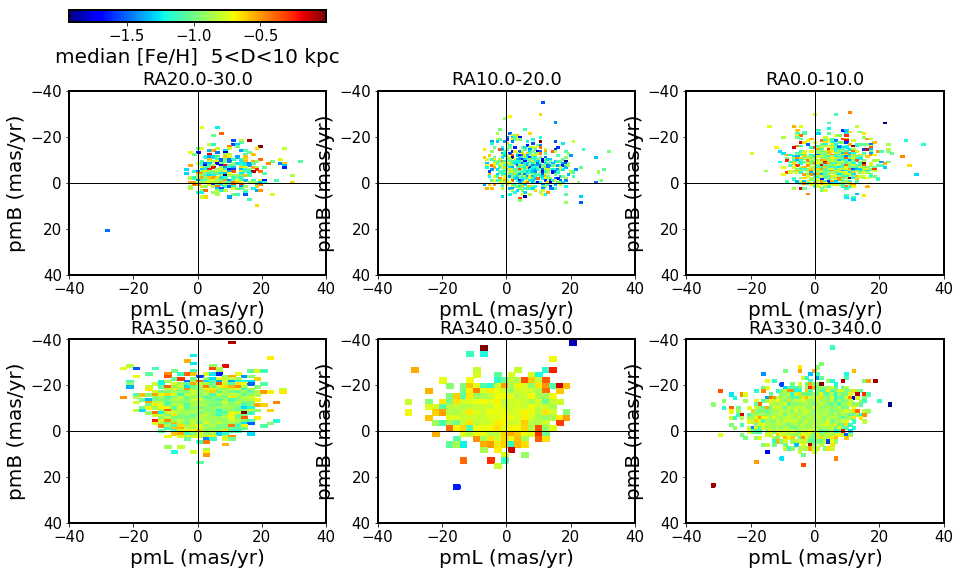

In [186]:
plotCoded2DmapRAbins(m2.pm_lcosb, m2.pm_b, m2.FeH, m2.i_sdsscentroid_ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  5<D<10 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/5<D<10_HSC_S82.png')

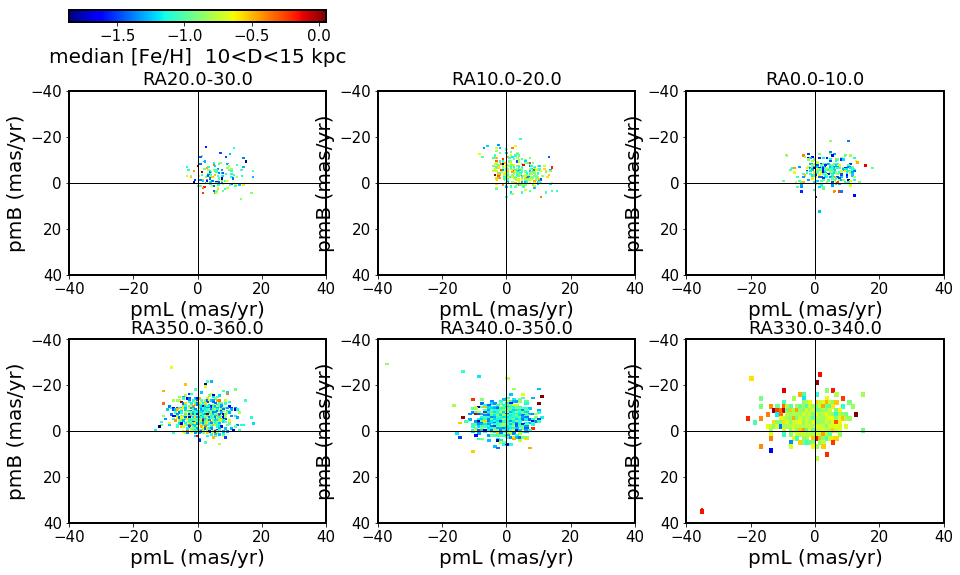

In [187]:
plotCoded2DmapRAbins(m3.pm_lcosb, m3.pm_b, m3.FeH, m3.i_sdsscentroid_ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  10<D<15 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/10<D<15_HSC_S82.png')

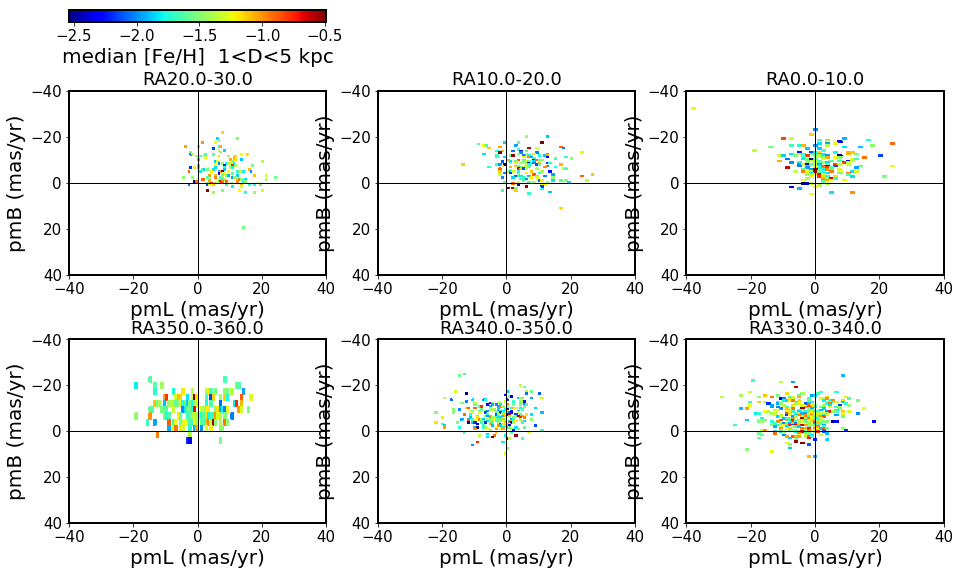

In [171]:
plotCoded2DmapRAbins(z1.pmL, z1.pmB, z1.Zph, z1.ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  1<D<5 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/1<D<5_SDSS.png')

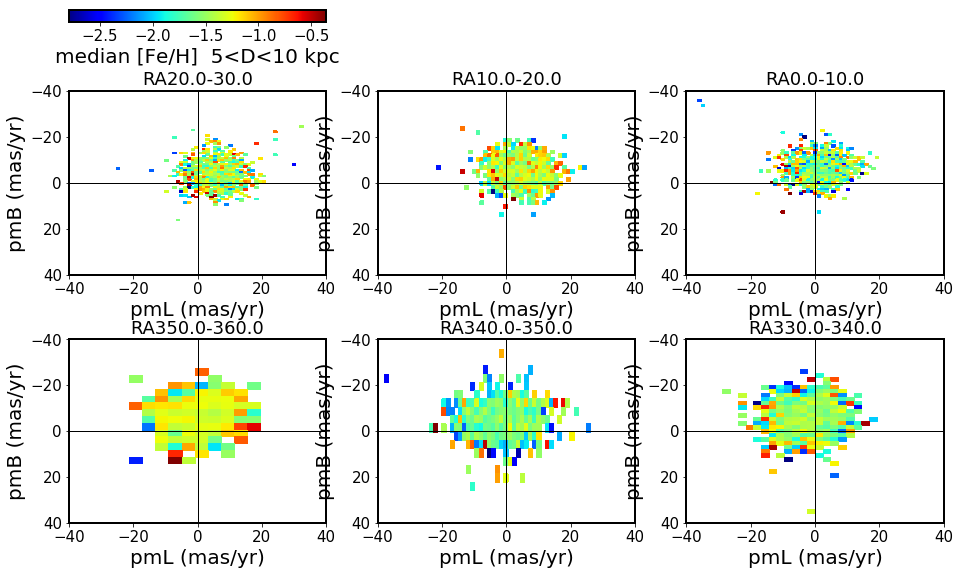

In [172]:
plotCoded2DmapRAbins(z2.pmL, z2.pmB, z2.Zph, z2.ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  5<D<10 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/5<D<10_SDSS.png')

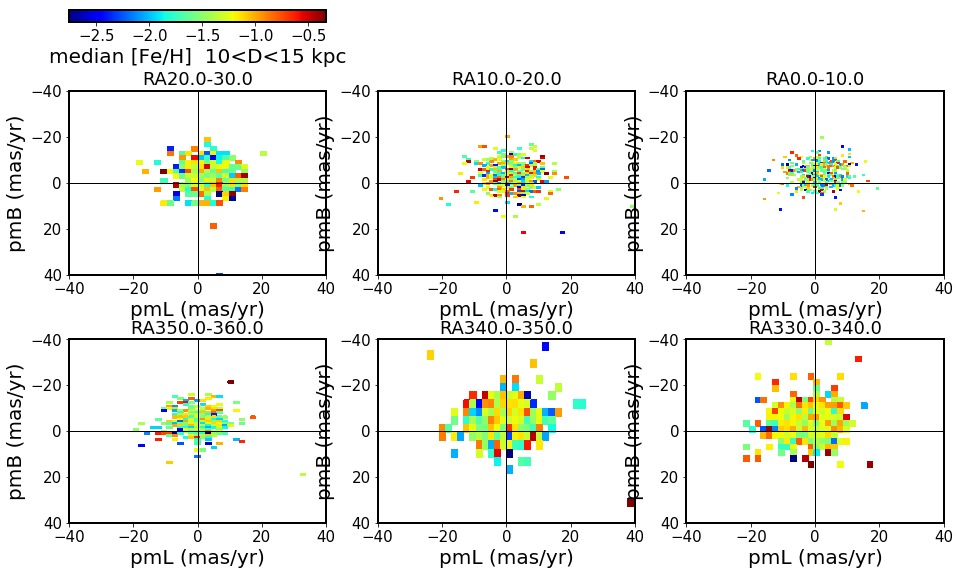

In [173]:
plotCoded2DmapRAbins(z3.pmL, z3.pmB, z3.Zph, z3.ra, -40, 40, -40, 40, 50, 'pmL (mas/yr)', 'pmB (mas/yr)', '[Fe/H]  10<D<15 kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/10<D<15_SDSS.png')

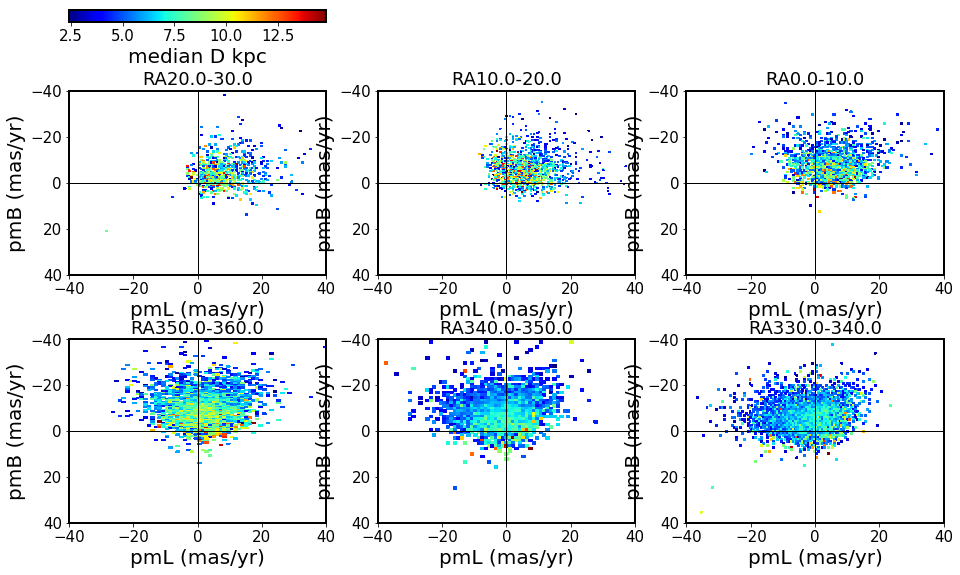

In [210]:
plotCoded2DmapRAbins(mb[mb.Dkpc<15].pm_lcosb, mb[mb.Dkpc<15].pm_b, mb[mb.Dkpc<15].Dkpc, mb[mb.Dkpc<15].ra_2, -40, 40, -40, 40, 100, 'pmL (mas/yr)', 'pmB (mas/yr)', 'D kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/dist_total_HSC_S82.png')

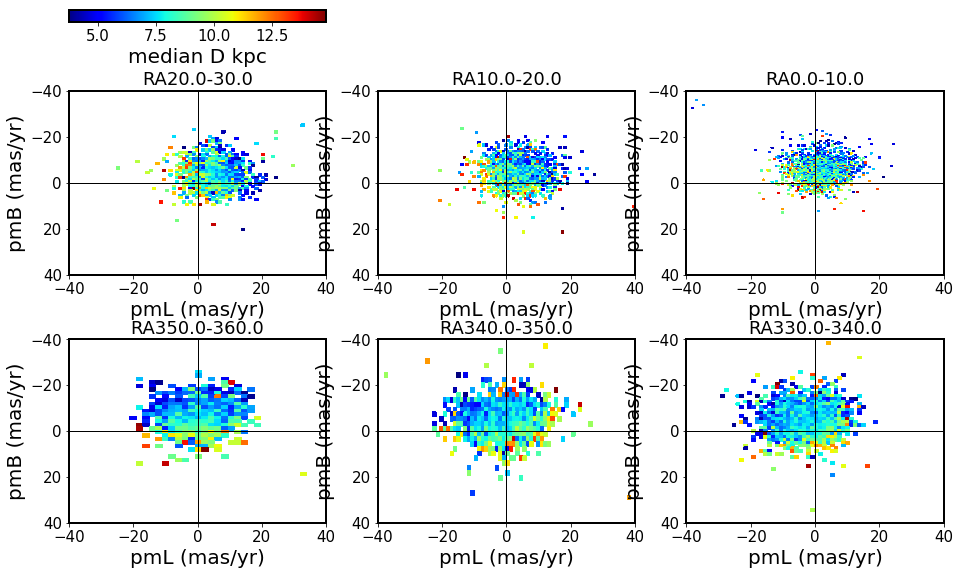

In [209]:
plotCoded2DmapRAbins(z[z.D<15].pmL, z[z.D<15].pmB, z[z.D<15].D, z[z.D<15].ra, -40, 40, -40, 40, 100, 'pmL (mas/yr)', 'pmB (mas/yr)', 'D kpc')
plt.savefig('/Users/tianqiu/Downloads/comparison/dist_total_SDSS.png')

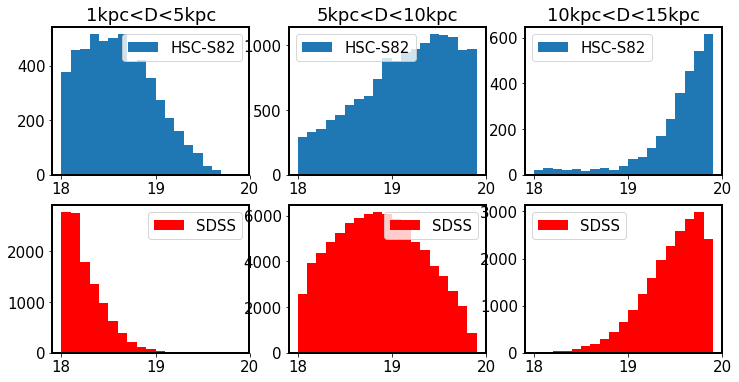

In [208]:
plt.figure(figsize=(12,6))
bins=np.arange(18,20,0.1)
plt.subplot(231)
plt.hist(m1.i,bins=bins,label='HSC-S82')
plt.legend()
plt.title('1kpc<D<5kpc')
plt.subplot(232)
plt.hist(m2.i,bins=bins,label='HSC-S82')
plt.legend()
plt.title('5kpc<D<10kpc')
plt.subplot(233)
plt.hist(m3.i,bins=bins,label='HSC-S82')
plt.legend()
plt.title('10kpc<D<15kpc')
plt.subplot(234)
plt.hist(z1.i,bins=bins,label='SDSS',color='red')
plt.legend()
plt.subplot(235)
plt.hist(z2.i,bins=bins,label='SDSS',color='red')
plt.legend()
plt.subplot(236)
plt.hist(z3.i,bins=bins,label='SDSS',color='red')
plt.legend()
plt.savefig('/Users/tianqiu/Downloads/comparison/mag_dist.png')

(array([ 223.,  317.,  429.,  433.,  512.,  574.,  614.,  663.,  755.,
         897.,  928.,  957.,  945., 1033., 1060., 1108., 1033.,  987.,
         994.,  887.]),
 array([18.0017738 , 18.1016834 , 18.20159299, 18.30150259, 18.40141218,
        18.50132178, 18.60123137, 18.70114097, 18.80105056, 18.90096016,
        19.00086975, 19.10077935, 19.20068894, 19.30059854, 19.40050813,
        19.50041773, 19.60032732, 19.70023692, 19.80014651, 19.90005611,
        19.9999657 ]),
 <a list of 20 Patch objects>)

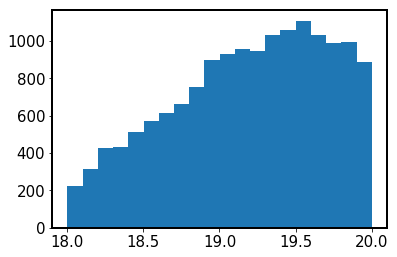

In [203]:
plt.hist(m2.i_psfflux_mag,bins=20)

In [47]:
10**0.26

1.8197008586099834

In [50]:
def getMainSequenceAbsMag(gi,FeH): 
    """Get absolute magnitude for main sequence stars using eqs. 2, 5, and 7 from
       Ivezic et al. 2008 (ApJ, 684, 287)"""

    # valid for 0.2 < g-i < 4.0 
    Mr0 = -5.06 + 14.32*gi - 12.97*gi**2 + 6.127*gi**3 - 1.267*gi**4 + 0.0967*gi**5
    # offset for metallicity, valid for -2.5 < FeH < 0.2
    Mr = Mr0 + 4.50 - 1.11*FeH - 0.18*FeH**2
    return Mr

def getMainSequenceDistanceKpc(gi,FeH,r): 
    """Get stellar distance in kpc"""
    
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    # distance in kpc
    Dkpc = 0.01 * 10**(0.2*(r-Mr))
    return Dkpc

def getMainSequenceAppMagforDistanceKpc(gi,FeH,Dkpc): 
    """Get apparent mag array for g-i array, given FeH and Dkpc"""
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    return Mr + 5*np.log10(100*Dkpc)  

def getPhotomMetallicityBond2010(ug,gr):
    """Get stellar photometric metallicity from the SDSS u, g and r magnitudes
       using eq.A1 from Bond et al. 2010 (ApJ, 716, 1):
       [Fe/H]=A+Bx+Cy+Dxy+Ex2+Fy2+Gx2y+Hxy2+Ix3+Jy3
       with x = (u-g) and y = (g-r), and the best-fit coefficients 
       (A-J) = (-13.13, 14.09, 28.04, -5.51, -5.90, -58.68, 9.14, -20.61, 0.0, 58.20).
       This expression if valid only for g-r<0.6; for redder stars uses [Fe/H] = -0.6.
       Beyond the limits -2.5 and 0.5, use the limits. Add Gaussian noise with rms=0.1"""

    # aux variables
    x = ug
    y = gr
    xy = x*y
    x2 = x*x
    y2 = y*y
    x2y = x*x*y
    xy2 = x*y*y
    y3 = y*y*y

    A = -13.13  
    B =  14.09
    C =  28.04
    D =  -5.51
    E =  -5.90
    F = -58.68
    G =   9.14
    H = -20.61
    I =  58.20
    FeH = A + B*x + C*y + D*xy + E*x2 + F*y2 + G*x2y + H*xy2 + I*y3 
    # add Gaussian noise (rms=0.1 dex) 
    np.random.seed(666) 
    b = np.random.randn(FeH.shape[0])  # Gaussian
    FeH = FeH + 0.1*b
    FeH[gr>0.6] = -0.6
    FeH[FeH < -2.5] = -2.5
    FeH[FeH > 0.5] = 0.5
    return FeH    

In [48]:
xxx=np.arange(-1,5,0.2)

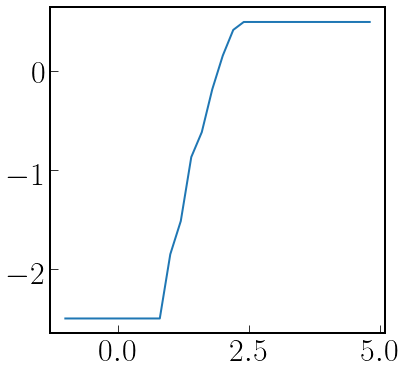

In [51]:
plt.plot(xxx,getPhotomMetallicityBond2010(xxx,0.6))

In [66]:
tt=mb[(mb.g_psfflux_mag<23)&(mb.g_psfflux_mag>22)]

In [67]:
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(tt.psfmag_u,tt.FeH, 20, 30, 20, 0)

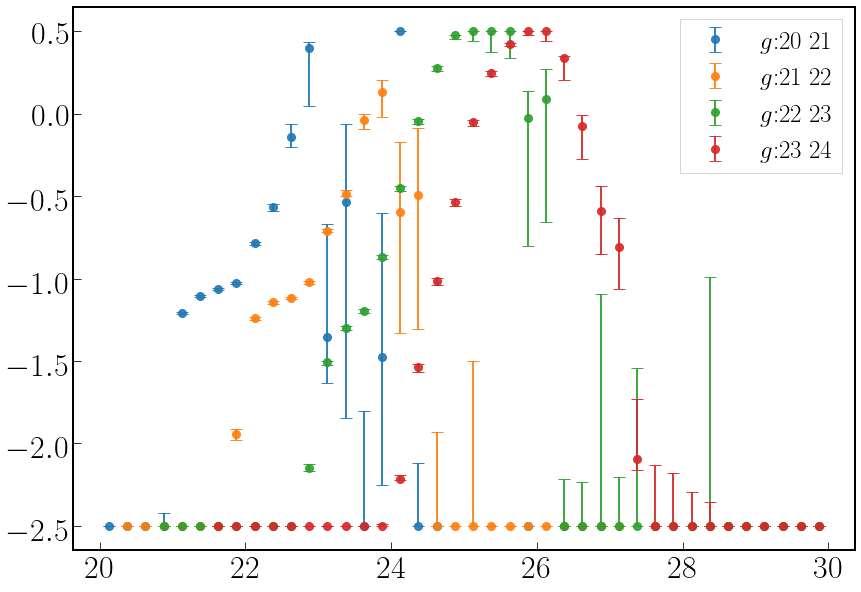

In [72]:
plt.figure(figsize=(14,10))
for i in range(20,24):
    tt=mb[(mb.g_psfflux_mag<i+1)&(mb.g_psfflux_mag>i)]
    x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(tt.psfmag_u,tt.FeH, 20, 30, 40, 0)
    plt.errorbar(x1Bin, m1edianBin, s1igGbin, fmt='o' ,capsize=6,markersize=8, alpha=0.9, label='$g$:'+str(i)+'~'+str(i+1))
plt.legend()